## Component 4 – Exploratory Data Analysis (EDA)

Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("All libraries imported successfully!")


All libraries imported successfully!


Load Dataset (FIXED)

In [4]:
file_path = "/content/component4_performance_dataset (3).csv"

df = pd.read_csv(file_path)

print("Dataset loaded successfully!")


Dataset loaded successfully!


First Look at Dataset

In [6]:
# First 5 rows
df.head()


,vehicle_id,duration,waiting_time,route_length,time_loss,avg_speed,waiting_ratio
0,16,53.0,0.0,489.60,8.54,9.237736,0.000000
1,38,57.0,0.0,671.10,14.55,11.773684,0.000000
2,43,73.0,0.0,667.58,13.17,9.144932,0.000000
3,61,67.0,0.0,768.14,9.93,11.464776,0.000000
4,73,72.0,37.0,381.15,46.38,5.293750,0.513889


Shape & Columns

In [7]:
# Dataset shape
print("Rows and Columns:", df.shape)


Rows and Columns: (2683, 7)


In [8]:
# Column names
df.columns


Index(['vehicle_id', 'duration', 'waiting_time', 'route_length', 'time_loss',
       'avg_speed', 'waiting_ratio'],
      dtype='object')

Dataset Information

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vehicle_id     2683 non-null   int64  
 1   duration       2683 non-null   float64
 2   waiting_time   2683 non-null   float64
 3   route_length   2683 non-null   float64
 4   time_loss      2683 non-null   float64
 5   avg_speed      2683 non-null   float64
 6   waiting_ratio  2683 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 146.9 KB


Statistical Summary

In [10]:
df.describe()


,vehicle_id,duration,waiting_time,route_length,time_loss,avg_speed,waiting_ratio
count,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000
mean,1467.056280,376.393962,128.040999,2660.648192,174.478748,8.672402,0.189277
std,925.825871,311.089731,264.091869,1238.185295,282.111435,3.088299,0.234347
min,0.000000,1.000000,0.000000,0.000000,0.820000,0.000000,0.000000
25%,671.500000,192.000000,0.000000,1719.690000,32.500000,6.986321,0.000000
50%,1383.000000,293.000000,24.000000,2593.200000,67.370000,9.005961,0.091904
75%,2206.500000,440.500000,100.000000,3490.150000,157.555000,10.632122,0.289898
max,3560.000000,2607.000000,2271.000000,6670.390000,2368.820000,21.173097,0.914910


Missing Values

In [11]:
# Missing values count
df.isnull().sum()


,0
vehicle_id,0
duration,0
waiting_time,0
route_length,0
time_loss,0
avg_speed,0
waiting_ratio,0


In [12]:
# Missing values percentage
(df.isnull().mean() * 100).round(2)


,0
vehicle_id,0.0
duration,0.0
waiting_time,0.0
route_length,0.0
time_loss,0.0
avg_speed,0.0
waiting_ratio,0.0


Separate Column Types

In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:\n", numerical_cols)
print("\nCategorical Columns:\n", categorical_cols)


Numerical Columns:
 Index(['vehicle_id', 'duration', 'waiting_time', 'route_length', 'time_loss',
       'avg_speed', 'waiting_ratio'],
      dtype='object')

Categorical Columns:
 Index([], dtype='object')


# EXPLORATORY DATA ANALYSIS (EDA)

Waiting Time Histogram

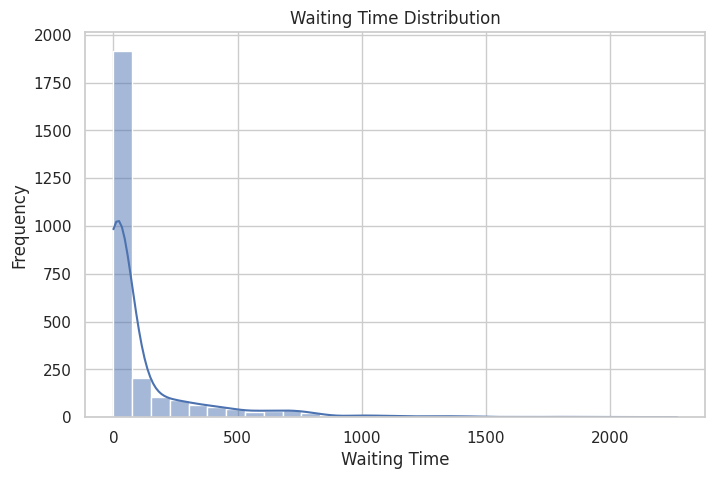

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['waiting_time'], bins=30, kde=True)
plt.title("Waiting Time Distribution")
plt.xlabel("Waiting Time")
plt.ylabel("Frequency")
plt.show()



Speed Histogram

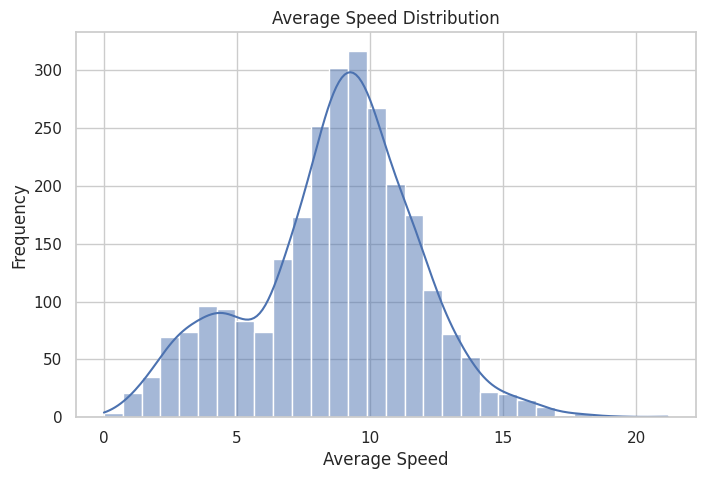

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['avg_speed'], bins=30, kde=True)
plt.title("Average Speed Distribution")
plt.xlabel("Average Speed")
plt.ylabel("Frequency")
plt.show()


Waiting Time Boxplot

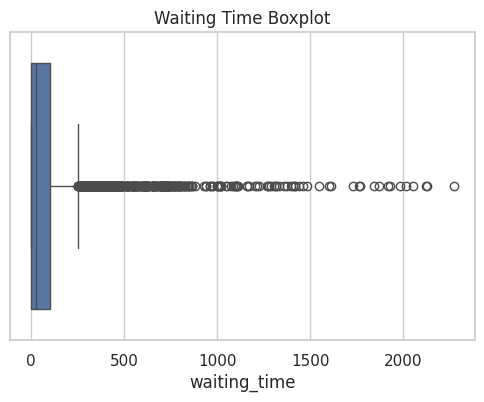

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['waiting_time'])
plt.title("Waiting Time Boxplot")
plt.show()


Speed Boxplot

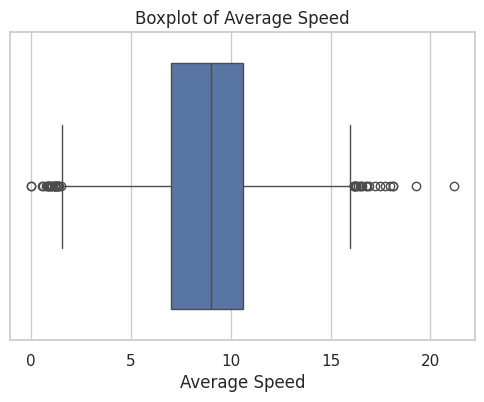

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['avg_speed'])
plt.title("Boxplot of Average Speed")
plt.xlabel("Average Speed")
plt.show()


Histograms for All Numerical Columns

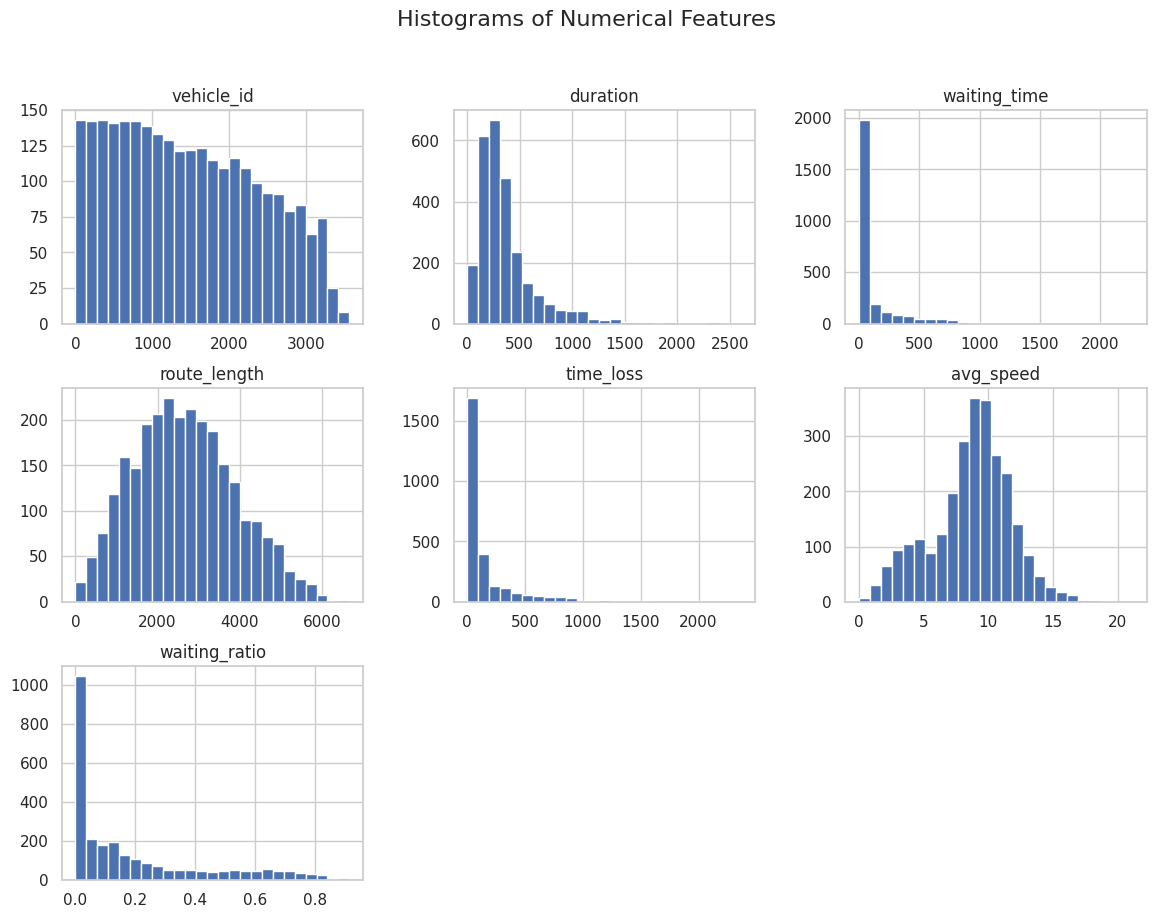

In [25]:
df[numerical_cols].hist(figsize=(14,10), bins=25)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


Boxplots for All Numerical Columns

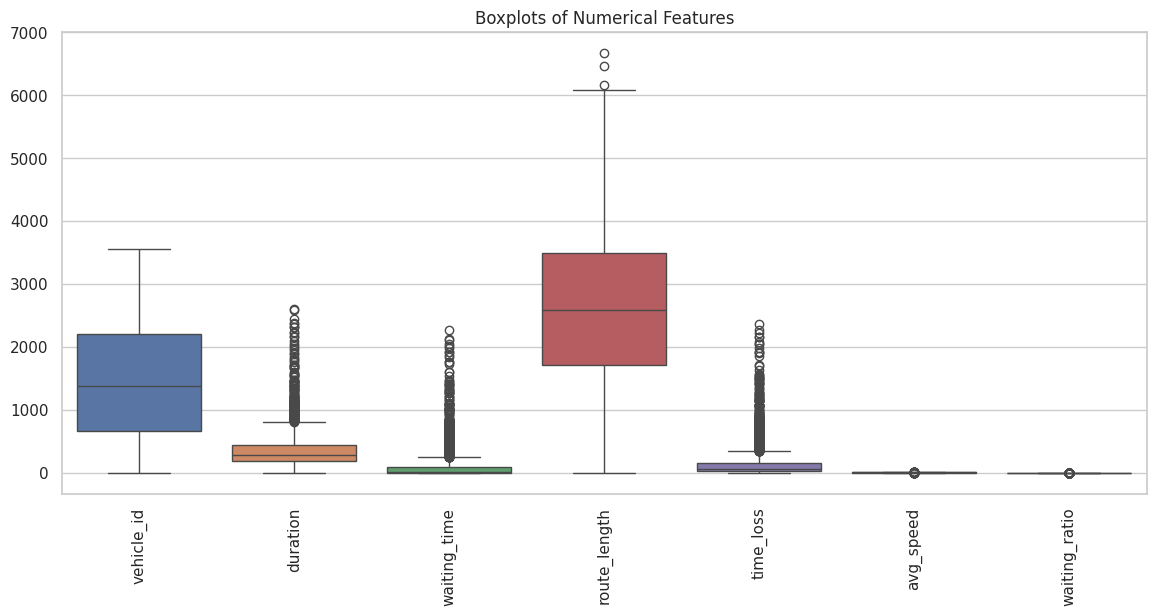

In [26]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Features")
plt.show()


Correlation Heatmap

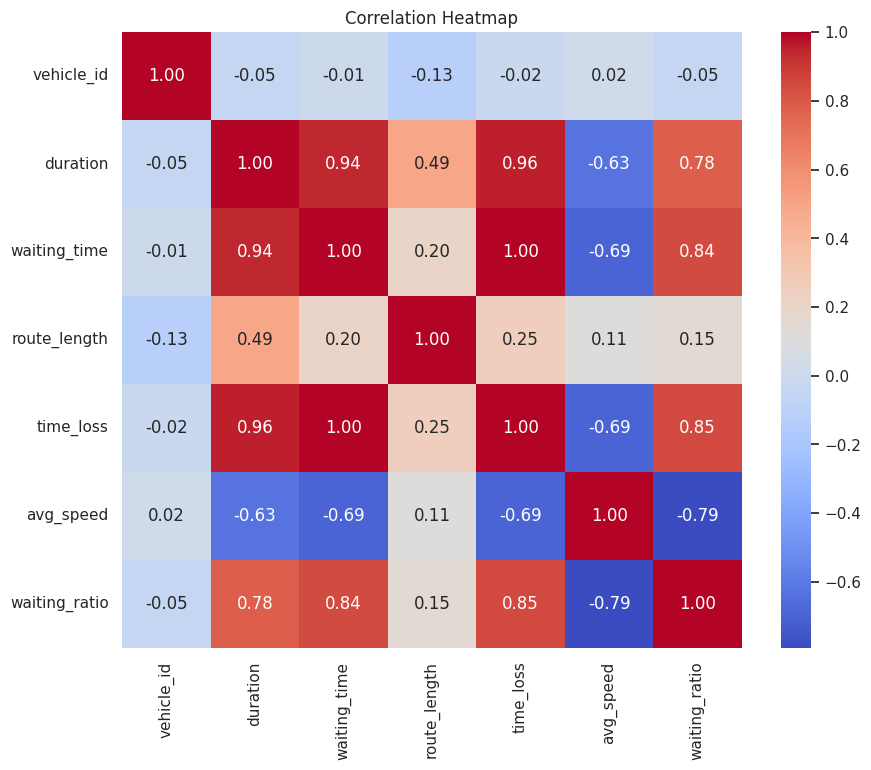

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
